<a href="https://colab.research.google.com/github/soumita654/fireducks-vs-pandas-benchmark/blob/main/FireDucks.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## ***Code Snippets with Benchmark Mode***

In [ ]:
#Enable FireDucks Benchmark Mode
import os
os.environ["FIREDUCKS_BENCHMARK"] = "1"

## **Force Evaluation**

In [ ]:
def evaluate(label, func):
    import time
    start = time.time()
    result = func()
    end = time.time()
    print(f"{label}: {end - start:.4f} sec")
    return result


## **🧪 Create Synthetic Dataset**

In [4]:
!pip install fireducks
import pandas as pd
import fireducks.pandas as pd
from sklearn.datasets import make_classification

X, y = make_classification(n_samples=10_000_000, n_features=20, random_state=42)
columns = [f'feature_{i}' for i in range(20)]

df_pd = pd.DataFrame(X, columns=columns)
df_pd['target'] = y

# Save as Parquet (used for both tools)
df_pd.to_parquet('benchmark_dataset.parquet')

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.4/7.4 MB 49.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.1/42.1 MB 15.8 MB/s eta 0:00:00
  Attempting uninstall: pyarrow
    Found existing installation: pyarrow 18.1.0
    Uninstalling pyarrow-18.1.0:
      Successfully uninstalled pyarrow-18.1.0


In [ ]:
import pandas as pd # This pd is overwritten
import fireducks.pandas as pd # by this pd

## **🐼 Benchmarking Pandas**

In [1]:
import time
from sklearn.preprocessing import MinMaxScaler
import pandas as pd # Make sure pandas is imported and aliased as pd

# Load with pandas
start = time.time()
df_pandas = pd.read_parquet('benchmark_dataset.parquet') # Now pd refers to pandas
df_pandas.head()  # Force evaluation
load_pandas_time = time.time() - start

# Preprocessing with pandas
start = time.time()
scaler = MinMaxScaler()
scaled_pandas = scaler.fit_transform(df_pandas.drop('target', axis=1))
_ = scaled_pandas.mean()  # Force evaluation
preprocess_pandas_time = time.time() - start

## **🔥 Benchmarking FireDucks**

In [6]:
# Load with FireDucks
import time # Import the time module here
import fireducks.pandas as pd  # Import fireducks.pandas as pd here

start = time.time()
df_fd = pd.read_parquet('benchmark_dataset.parquet')
df_fd.head()  # Force evaluation
load_fd_time = time.time() - start

# Preprocessing
start = time.time()
# Use the columns attribute to select columns to drop
fd_values = df_fd[[col for col in df_fd.columns if col != 'target']].to_numpy()

# Assuming 'scaler' is defined in a previous cell
# If not, you'll need to define it before using it here
from sklearn.preprocessing import MinMaxScaler # import MinMaxScaler
scaler = MinMaxScaler() # define scaler

scaled_fd = scaler.fit_transform(fd_values)
_ = scaled_fd.mean()  # Force evaluation
preprocess_fd_time = time.time() - start

## **🧾 Benchmark Summary**

In [1]:
from IPython import get_ipython
from IPython.display import display
# %%
#Enable FireDucks Benchmark Mode
import os
os.environ["FIREDUCKS_BENCHMARK"] = "1"
# %%
def evaluate(label, func):
    import time
    start = time.time()
    result = func()
    end = time.time()
    print(f"{label}: {end - start:.4f} sec")
    return result

# %%
!pip install fireducks
import pandas as pd
import fireducks.pandas as fpd # Change to fpd to avoid conflict
from sklearn.datasets import make_classification

X, y = make_classification(n_samples=10_000_000, n_features=20, random_state=42)
columns = [f'feature_{i}' for i in range(20)]

df_pd = pd.DataFrame(X, columns=columns)
df_pd['target'] = y

# Save as Parquet (used for both tools)
df_pd.to_parquet('benchmark_dataset.parquet')
# %%

# %%
# Removed conflicting import - import pandas as pd
# Removed conflicting import - import fireducks.pandas as pd
# %%

# %%
import time
from sklearn.preprocessing import MinMaxScaler
import pandas as pd # Make sure pandas is imported and aliased as pd

# Load with pandas
start = time.time()
df_pandas = pd.read_parquet('benchmark_dataset.parquet') # Now pd refers to pandas
df_pandas.head()  # Force evaluation
load_pandas_time = time.time() - start

# Preprocessing with pandas
start = time.time()
scaler = MinMaxScaler()
scaled_pandas = scaler.fit_transform(df_pandas.drop('target', axis=1))
_ = scaled_pandas.mean()  # Force evaluation
preprocess_pandas_time = time.time() - start
# %%
# Load with FireDucks
import time # Import the time module here
import fireducks.pandas as fpd  # Import fireducks.pandas as fpd here

start = time.time()
df_fd = fpd.read_parquet('benchmark_dataset.parquet') # Use fpd to call read_parquet
df_fd.head()  # Force evaluation
load_fd_time = time.time() - start

# Preprocessing
start = time.time()
# Use the columns attribute to select columns to drop
fd_values = df_fd[[col for col in df_fd.columns if col != 'target']].to_numpy()

# Assuming 'scaler' is defined in a previous cell
# If not, you'll need to define it before using it here
from sklearn.preprocessing import MinMaxScaler # import MinMaxScaler
scaler = MinMaxScaler() # define scaler

scaled_fd = scaler.fit_transform(fd_values)
_ = scaled_fd.mean()  # Force evaluation
preprocess_fd_time = time.time() - start
# %%
print("\n=== Benchmark Summary ===")
print(f"Pandas Load Time         : {load_pandas_time:.2f} sec")
print(f"FireDucks Load Time      : {load_fd_time:.2f} sec")
print(f"Pandas Preprocessing Time: {preprocess_pandas_time:.2f} sec")
print(f"FireDucks Preprocessing  : {preprocess_fd_time:.2f} sec")


=== Benchmark Summary ===
Pandas Load Time         : 3.14 sec
FireDucks Load Time      : 0.10 sec
Pandas Preprocessing Time: 2.49 sec
FireDucks Preprocessing  : 6.48 sec


## **📊 Visualization**

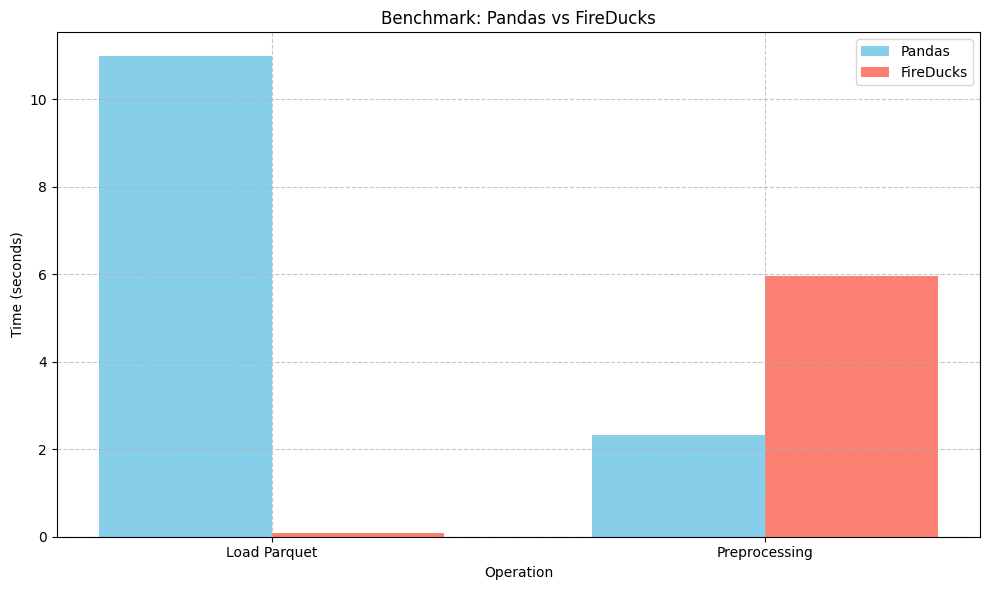

In [7]:
import matplotlib.pyplot as plt

labels = ['Load Parquet', 'Preprocessing']
pandas_times = [load_pandas_time, preprocess_pandas_time]
fireducks_times = [load_fd_time, preprocess_fd_time]

bar_width = 0.35
index = range(len(labels))

plt.figure(figsize=(10, 6))
plt.bar(index, pandas_times, bar_width, label='Pandas', color='skyblue')
plt.bar([i + bar_width for i in index], fireducks_times, bar_width, label='FireDucks', color='salmon')

plt.xlabel('Operation')
plt.ylabel('Time (seconds)')
plt.title('Benchmark: Pandas vs FireDucks')
plt.xticks([i + bar_width / 2 for i in index], labels)
plt.legend()
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

##**Configuration**

In [2]:
!pip install python-dotenv

In [3]:
import os
from dotenv import load_dotenv

load_dotenv()

FIREDUCKS_BENCHMARK = os.getenv("FIREDUCKS_BENCHMARK", "1")
DATA_PATH = os.getenv("DATA_PATH", "./data/benchmark_dataset.parquet")
NUM_SAMPLES = int(os.getenv("NUM_SAMPLES", 10_000_000))
NUM_FEATURES = int(os.getenv("NUM_FEATURES", 20))
SEED = int(os.getenv("SEED", 42))